In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('dataset.csv')

In [5]:
# Separate features (X) and target (y)
X = data.drop(columns=['target'])  # Drop the target column 'stroke'
y = data['target']  # Target variable

In [6]:
# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize the features (since KNN is distance-based and sensitive to scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Convert scaled data back into a DataFrame for easier feature selection
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [9]:
# Initialize KNN model (with k=5 as a starting point)
k = 5
model = KNeighborsClassifier(n_neighbors=k)

In [10]:
# Initialize empty lists for selected features and remaining features
selected_features = []
remaining_features = list(X_train_scaled.columns)

In [11]:
# Best score tracker
best_score = 0

In [12]:
# Forward feature selection loop
while remaining_features:
    best_feature = None
    for feature in remaining_features:
        # Create temporary list of selected features + current feature
        temp_features = selected_features + [feature]
        
        # Train KNN with the selected features
        X_train_temp = X_train_scaled[temp_features]
        X_test_temp = X_test_scaled[temp_features]
        
        model.fit(X_train_temp, y_train)
        y_pred = model.predict(X_test_temp)
        
        # Calculate accuracy score
        score = accuracy_score(y_test, y_pred)
        
        # If this feature improves the score, update best_feature and best_score
        if score > best_score:
            best_score = score
            best_feature = feature
    
    # If a feature improved the score, add it to selected features and remove from remaining features
    if best_feature:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        print(f'ADDED FEATURE: {best_feature}, SCORE: {best_score:.4f}')
    else:
        # Stop if no feature improves the score
        break

ADDED FEATURE: cp, SCORE: 0.8033
ADDED FEATURE: thal, SCORE: 0.8197
ADDED FEATURE: ca, SCORE: 0.8852
ADDED FEATURE: chol, SCORE: 0.9016


In [13]:
# Final model with selected features
print(f"\nSelected Features: {selected_features}")
print(f"Final Accuracy: {best_score:.4f}")


Selected Features: ['cp', 'thal', 'ca', 'chol']
Final Accuracy: 0.9016


In [14]:
# Final predictions on the test set using the selected features
X_train_final = X_train_scaled[selected_features]
X_test_final = X_test_scaled[selected_features]
model.fit(X_train_final, y_train)
y_pred_final = model.predict(X_test_final)

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[25  4]
 [ 2 30]]


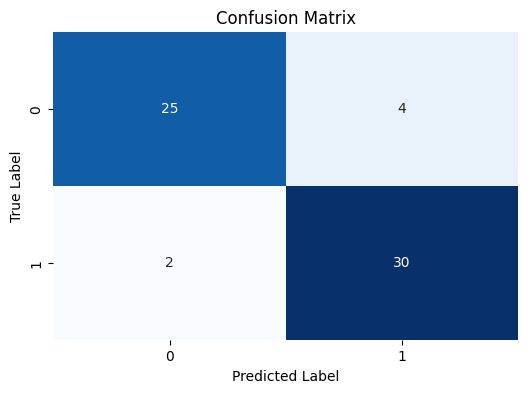

In [16]:
# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()